# Clustering for optimal number and localization of last-mile distribution centers

In [1]:
import numpy as np

def kmeans(X, K, max_iters=100):
    # Step 1: Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    success = False

    for _ in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroid = np.argmin(distances, axis=0)

        # Step 3: Update centroids
        new_centroids = np.array([X[closest_centroid == k].mean(axis=0) for k in range(K)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            success = True
            break

        centroids = new_centroids

    if success:
        return closest_centroid, centroids
    else:
        return None, None



## Dataset Generation
We'll generate a synthetic dataset of 300 addresses in California


  Obtaining dependency information for random_address from https://files.pythonhosted.org/packages/21/90/85978e0cff44dbe3d89b2aed9d20cfb68863392566a3f6823281adcf6642/random_address-1.1.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 5.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


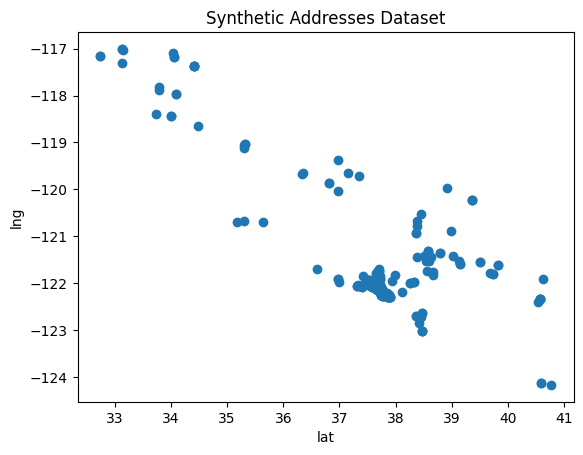

In [2]:
import matplotlib.pyplot as plt
! pip install random_address
import random_address

# Generate synthetic data
X = []
for _ in range(300):
    loc = random_address.real_random_address_by_state('CA')['coordinates']
    X.append([loc['lat'], loc['lng']])
X = np.array(X)

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Synthetic Addresses Dataset')
plt.xlabel('lat')
plt.ylabel('lng')
plt.show()



## Visualization
We'll visualize the results of our k-means clustering.


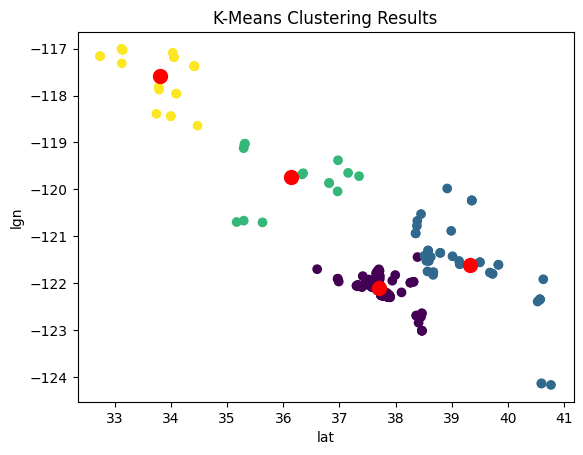

In [3]:

# Apply k-means
K = 4
labels, centroids = kmeans(X, K)
# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red') # Centroids
plt.title('K-Means Clustering Results')
plt.xlabel('lat')
plt.ylabel('lgn')
plt.show()



## Elbow Method
The elbow method helps to determine the optimal number of clusters. We plot the variance against the number of clusters and look for an 'elbow' where the rate of decrease sharply changes.


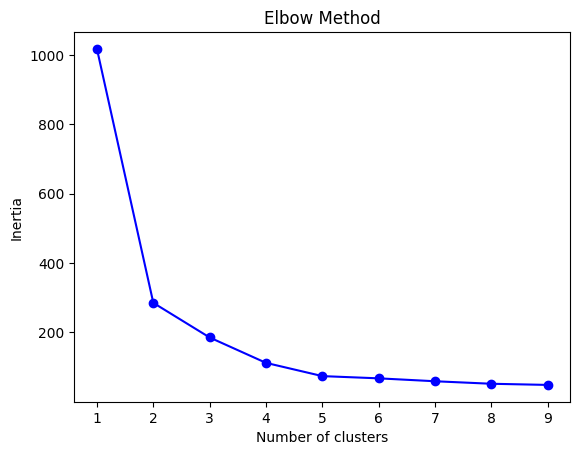

In [4]:

def compute_inertia(X, centroids, labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        inertia += ((X[labels == i] - centroid) ** 2).sum()
    return inertia

inertias = []
for k in range(1, 10):
    labels, centroids = kmeans(X, k, max_iters=100)
    if labels is None:
        inertia = inertias[-1]
    else:
        inertia = compute_inertia(X, centroids, labels)
    inertias.append(inertia)

plt.plot(range(1, 10), inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



## Automatic Cluster Number Selection
We'll use the differences in the elbow graph to automatically select the number of clusters.


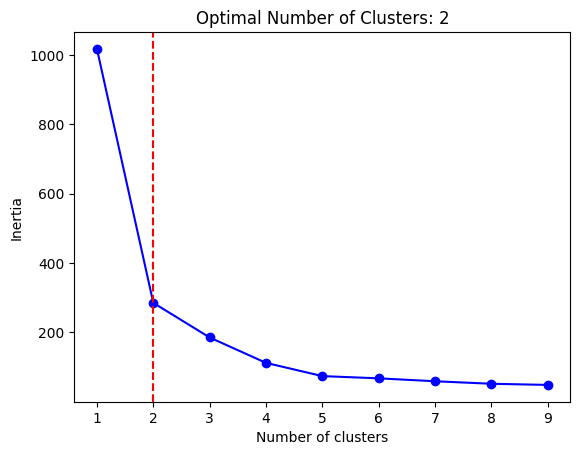

In [5]:

# Calculate the differences in inertia
diffs = np.diff(inertias)
# Find the elbow point
optimal_k = np.argmin(diffs[diffs < 0]) + 2

plt.plot(range(1, 10), inertias, 'bo-')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.title('Optimal Number of Clusters: {}'.format(optimal_k))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Non-cluster-based Method - DBScan

In [7]:
from sklearn.cluster import DBSCAN

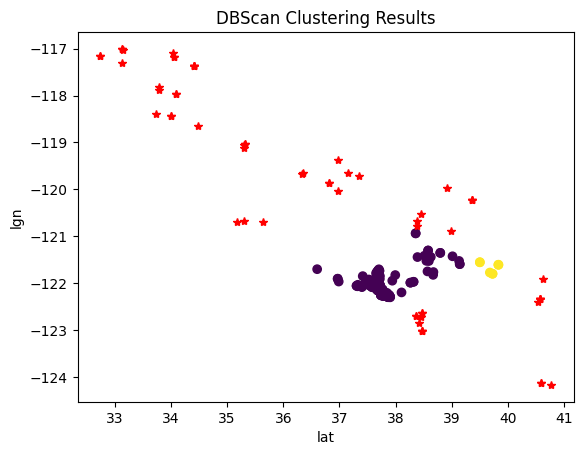

In [8]:
clustering = DBSCAN(eps=0.5, min_samples=10).fit_predict(X)
X_cluster = X[clustering >= 0]
X_noise = X[clustering < 0]
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=clustering[clustering>=0], cmap='viridis')
plt.plot(X_noise[:, 0], X_noise[:, 1], 'r*')
plt.title('DBScan Clustering Results')
plt.xlabel('lat')
plt.ylabel('lgn')
plt.show()